<a href="https://www.kaggle.com/code/mudasarsabir/titanic-competition-by-logistic-regression?scriptVersionId=237739414" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification Algorithms (Logistic Regression With Titanic Dataset) and Model Evaluation

In this notebook, we will cover:

* Logistic Regression
* Confusion Matrix
* Precision, Recall, Accuracy, F1 Score
* ROC AUC Curve
* Deciding Binary Classifier threshold


## Importing all necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Setting global seed of notebook

In [2]:
np.random.seed(seed=25)

# Task 1: Load Data from 'titanic_clean.csv'

In [3]:
#write code here
data = pd.read_csv('/kaggle/input/titanic-dataset/titanic_clean.csv')
df = data.copy()
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,1,0,3,male,1,0,S,Mr,couple,0-10,16-32
1,2,1,1,female,1,0,C,Mrs,couple,70-100,32-48
2,3,1,3,female,0,0,S,Miss,solo,0-10,16-32
3,4,1,1,female,1,0,S,Mrs,couple,40-70,32-48
4,138,0,1,male,1,0,S,Mr,couple,40-70,32-48


## One Hot encoding for categorical varaibles (For Nominal)/(For Ordinal) use Lable Encoder

In [4]:
df_OneHot=pd.get_dummies(df,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot = df_OneHot.astype(int)
df_OneHot.head()

,PassengerId,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,2,1,1,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0
2,3,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,4,1,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,138,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
df_OneHot.columns

Index(['PassengerId', 'Survived', 'SibSp', 'Parch', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare Title', 'GrpSize_couple', 'GrpSize_group',
       'GrpSize_large group', 'GrpSize_solo', 'FareCat_0-10', 'FareCat_10-25',
       'FareCat_100+', 'FareCat_25-40', 'FareCat_40-70', 'FareCat_70-100',
       'AgeCat_0-16', 'AgeCat_16-32', 'AgeCat_32-48', 'AgeCat_48-64',
       'AgeCat_64+'],
      dtype='object')

In [6]:
df=df_OneHot.copy()

# Task 2: Create Independent and Dependent Variables

In [7]:
#write code here
X = df.drop(['PassengerId','Survived'], axis=1)
Y = df[['Survived']]

# Task 3: Train Test n Split the data

In [8]:
X.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,1,0,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [9]:
# Import the library
from sklearn.model_selection import train_test_split

In [10]:
#Write the code here
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(623, 30) (623, 1)
(268, 30) (268, 1)


In [11]:
xtrain.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
707,0,0,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,1,0,0,0
246,0,1,0,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
624,1,1,1,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
96,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [12]:
ytrain.head()

,Survived
707,0
246,0
624,1
96,1
576,0


# Logistic Regression

## Creating Model & Training

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
lr_model = LogisticRegression(random_state=25)

In [15]:
lr_model.fit(xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=25)

## Evaluation 

In [16]:
pred = lr_model.predict(xtest)

In [17]:
pred[0:9]

array([0, 0, 0, 0, 0, 1, 0, 1, 0])

Predicting prabability of **0** and **1**

In [18]:
pred_prb = lr_model.predict_proba(xtest)

In [19]:
pred_prb

array([[9.54616431e-01, 4.53835695e-02],
       [9.28894260e-01, 7.11057399e-02],
       [9.00859885e-01, 9.91401146e-02],
       [9.28894260e-01, 7.11057399e-02],
       [9.28894260e-01, 7.11057399e-02],
       [2.65840408e-01, 7.34159592e-01],
       [9.28894260e-01, 7.11057399e-02],
       [1.73637248e-01, 8.26362752e-01],
       [9.54616431e-01, 4.53835695e-02],
       [9.28894260e-01, 7.11057399e-02],
       [1.00871350e-01, 8.99128650e-01],
       [6.13674655e-01, 3.86325345e-01],
       [9.28894260e-01, 7.11057399e-02],
       [9.28894260e-01, 7.11057399e-02],
       [5.36110715e-01, 4.63889285e-01],
       [4.26100846e-01, 5.73899154e-01],
       [7.98284232e-01, 2.01715768e-01],
       [6.10451718e-01, 3.89548282e-01],
       [7.16170391e-01, 2.83829609e-01],
       [1.40075222e-01, 8.59924778e-01],
       [6.16701548e-01, 3.83298452e-01],
       [4.47889371e-01, 5.52110629e-01],
       [9.91935171e-01, 8.06482853e-03],
       [9.28894260e-01, 7.11057399e-02],
       [6.211154

In [20]:
pred_prb[0:9]

array([[0.95461643, 0.04538357],
       [0.92889426, 0.07110574],
       [0.90085989, 0.09914011],
       [0.92889426, 0.07110574],
       [0.92889426, 0.07110574],
       [0.26584041, 0.73415959],
       [0.92889426, 0.07110574],
       [0.17363725, 0.82636275],
       [0.95461643, 0.04538357]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [21]:
lr_pred_prb = lr_model.predict_proba(xtest)[:,1]

In [22]:
lr_pred_prb

array([4.53835695e-02, 7.11057399e-02, 9.91401146e-02, 7.11057399e-02,
       7.11057399e-02, 7.34159592e-01, 7.11057399e-02, 8.26362752e-01,
       4.53835695e-02, 7.11057399e-02, 8.99128650e-01, 3.86325345e-01,
       7.11057399e-02, 7.11057399e-02, 4.63889285e-01, 5.73899154e-01,
       2.01715768e-01, 3.89548282e-01, 2.83829609e-01, 8.59924778e-01,
       3.83298452e-01, 5.52110629e-01, 8.06482853e-03, 7.11057399e-02,
       9.37888457e-01, 9.71989007e-01, 1.26238419e-01, 5.21030362e-01,
       3.89548282e-01, 8.04527796e-01, 1.26238419e-01, 7.15160680e-01,
       7.79041775e-01, 4.53835695e-02, 1.54320593e-01, 8.53882801e-01,
       8.25835752e-01, 4.08713945e-01, 1.50525815e-01, 5.32199418e-01,
       6.69247825e-02, 7.38789035e-02, 1.26238419e-01, 6.84175592e-01,
       1.66934121e-01, 7.11057399e-02, 8.77762574e-01, 1.66934121e-01,
       1.10676837e-01, 7.99452416e-01, 3.61561065e-01, 1.26238419e-01,
       7.38326498e-01, 1.29726373e-01, 7.80605251e-01, 8.80308799e-02,
      

## Comparison of Predicted and Actual

In [23]:
xtest.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [24]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+,pred,pred_probability,actual
760,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.045384,0
773,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0
266,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0.099140,0
507,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,1
524,0,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.071106,0


## Confusion Matrix Play ground

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix(ytest, pred)

array([[150,  19],
       [ 29,  70]])

In [27]:
confusion_matrix(ytest, pred).ravel()

array([150,  19,  29,  70])

In [28]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,70,29
Not Survived,19,150


## Accuracy

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8208955223880597


In [31]:
accuracy_lr = accuracy_score(ytest,pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))

Accuracy by built-in function: 0.8208955223880597


## Precision

In [32]:
from sklearn.metrics import precision_score

In [33]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.7865168539325843
Precision for 0: 0.8379888268156425


In [34]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function: {}".format(precision_lr))

Precision by built-in function: 0.7865168539325843


In [35]:
precision_lr = precision_score(ytest,pred)
print("Precision by built-in function:",precision_lr)

Precision by built-in function: 0.7865168539325843


## Recall

In [36]:
from sklearn.metrics import recall_score

In [37]:
recall_1 = tp / (tp + fn)
print("Recall for 1: {}".format(recall_1))
recall_0 = tn / (tn + fp)
print("Recall for 0: {}".format(recall_0))

Recall for 1: 0.7070707070707071
Recall for 0: 0.8875739644970414


In [38]:
recall_lr = recall_score(ytest,pred)
print("Recall by built-in function: {}".format(recall_lr))

Recall by built-in function: 0.7070707070707071


## F1 Score

In [39]:
from sklearn.metrics import f1_score

In [40]:
f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
print("F1 Score for 1: {}".format(f1_1))
f1_0 = (2 * precision_0 * recall_0) / (precision_0 + recall_0)
print("F1 Score for 0: {}".format(f1_0))

F1 Score for 1: 0.7446808510638298
F1 Score for 0: 0.8620689655172413


In [41]:
f1_lr=f1_score(ytest,pred)
print("F1 Score by built-in function: {}".format(f1_lr))

F1 Score by built-in function: 0.7446808510638298


## Class Distribution in Training Data

In [42]:
ytrain.value_counts()

Survived
0           380
1           243
Name: count, dtype: int64

In [43]:
ytest.value_counts()

Survived
0           169
1            99
Name: count, dtype: int64

## Classification Report

In [44]:
from sklearn.metrics import classification_report

In [45]:
#get report of precision recall and f1 score
print(classification_report(ytest,pred))
#macro avg 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       169
           1       0.79      0.71      0.74        99

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [46]:
def adjusted_classes(pred_prob, threshold):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= threshold else 0 for y in pred_prob]

def conf_matrix(ytest,lr_pred_prb,threshold=0.5):
    pred_adj = adjusted_classes(lr_pred_prb, threshold)
    tn, fp, fn, tp = confusion_matrix(ytest, pred_adj).ravel()
   
    #confusion matrix
    print(pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"]))
    
    #accuracy
    print("Accuracy: %0.3f"%((tp+tn)/(tn+fp+fn+tp)*100))
    
    #precision
    precision_1 = tp / (tp + fp)
    print("Precision : %0.3f"% (precision_1*100))
       
    #recall
    recall_1 = tp / (tp + fn)
    print("Recall: %0.3f"%(recall_1*100))
    
    #f1 score
    f1_1 = (2 * precision_1 * recall_1) / (precision_1 + recall_1)
    print("F1 Score : %0.3f"%(f1_1*100))

    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    print("TPR: %0.3f"%(tpr*100)," FPR: %0.3f"%(fpr*100))

In [47]:
conf_matrix(ytest,lr_pred_prb)

              pred_Survived  pred_Not Survived
Survived                 70                 29
Not Survived             19                150
Accuracy: 82.090
Precision : 78.652
Recall: 70.707
F1 Score : 74.468
TPR: 70.707  FPR: 11.243


## ROC AUC Curve

_Receiver Operating Characteristic_ & _Area Under Curve_

In [48]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [49]:
tpr, fpr

(0.7070707070707071, 0.11242603550295859)

In [50]:
fpr = 1 - recall_0
tpr, fpr

(0.7070707070707071, 0.1124260355029586)

Defining function to plot ROC AUC Curve

In [51]:
from sklearn.metrics import auc,roc_curve,roc_auc_score

In [52]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

Getting TPR, FPR values for each threshold on ROC AUC Curve

In [53]:
fpr,tpr,threshold=roc_curve(ytest,lr_pred_prb)

Calculating AUC score from ytest and predicted probabilities

In [54]:
auc_lr=roc_auc_score(ytest,lr_pred_prb)
auc_lr

0.8313908313908313

Plotting AUC ROC Curve

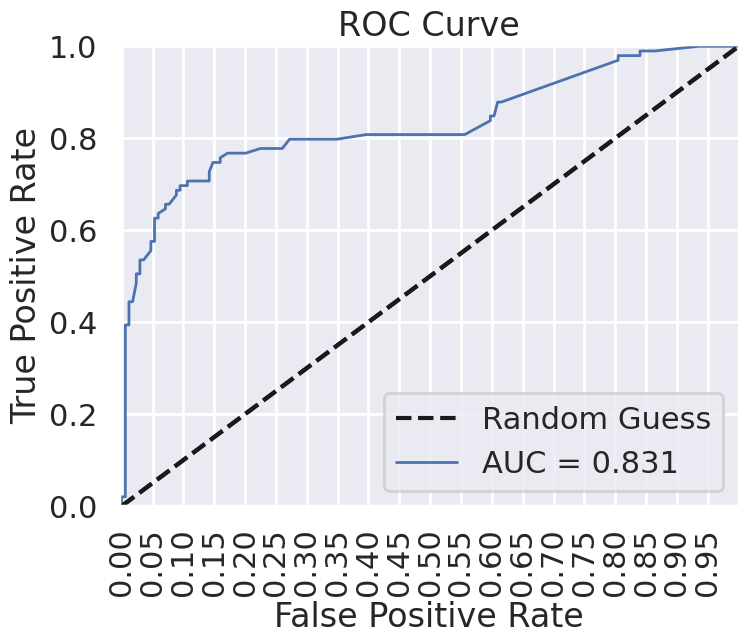

In [55]:
sns.set_context('poster')
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_lr)

## Model Complexity

In [56]:
from sklearn.preprocessing import PolynomialFeatures
acc_train=[]
acc_test=[]

for i in range(1,6):
    poly_reg = PolynomialFeatures(degree=i)
    
    X_tr_poly,X_tst_poly= poly_reg.fit_transform(xtrain),poly_reg.fit_transform(xtest)
    
    lr_poly = LogisticRegression(random_state=25)
    lr_poly.fit(X_tr_poly, ytrain)
   
    y_tr_predicted,y_tst_predict = lr_poly.predict(X_tr_poly),lr_poly.predict(X_tst_poly)
   
    acc_train.append(accuracy_score(ytrain, y_tr_predicted))
    acc_test.append(accuracy_score(ytest, y_tst_predict))
    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: >

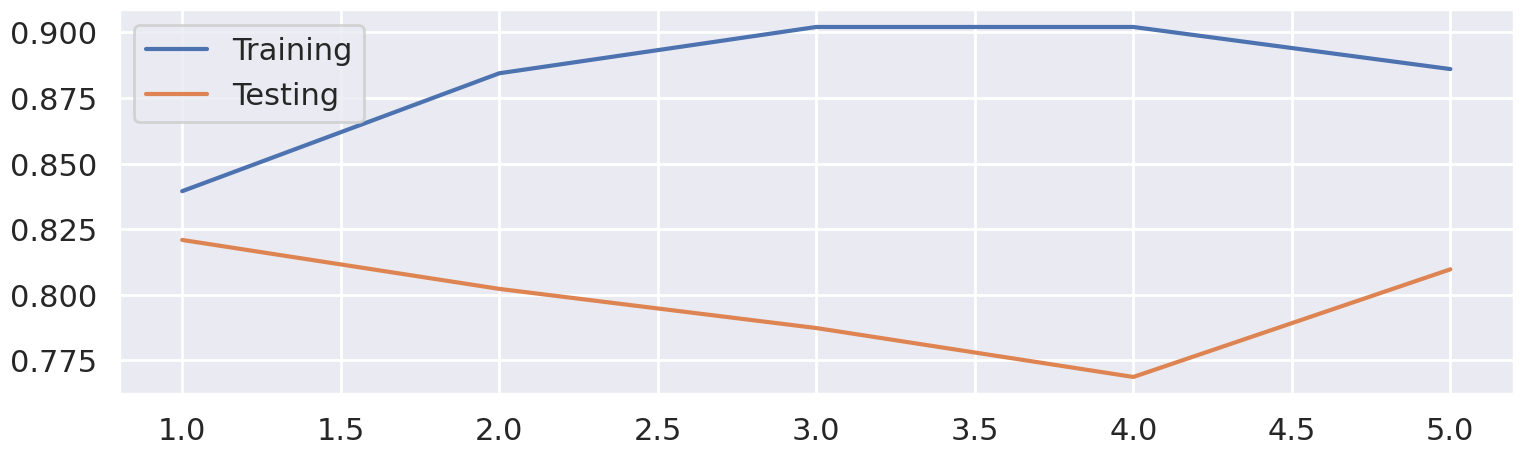

In [57]:
plt.figure(figsize=(18,5))
sns.set_context('poster')

sns.lineplot(x=list(range(1,6)), y=acc_train, label='Training')

sns.lineplot(x=list(range(1,6)), y=acc_test, label='Testing')

# Task 4: Submission on Kaggle

### Task 4: Import test data

In [58]:
#write code here
test = pd.read_csv('/kaggle/input/titanic-dataset/competition_clean.csv')
df_test = test.copy()
df_test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,Title,GrpSize,FareCat,AgeCat
0,892,3,male,0,0,Q,Mr,solo,0-10,32-48
1,893,3,female,1,0,S,Mrs,couple,0-10,32-48
2,894,2,male,0,0,Q,Mr,solo,0-10,48-64
3,895,3,male,0,0,S,Mr,solo,0-10,16-32
4,896,3,female,1,1,S,Mrs,group,10-25,16-32


In [59]:
df_test.shape

(418, 10)

# Task 5: Do One Hot encoding of test data

In [60]:
#write code here
df_OneHot=pd.get_dummies(df_test,columns=['Pclass','Sex','Embarked','Title','GrpSize','FareCat','AgeCat'])
df_OneHot = df_OneHot.astype(int)
df_test = df_OneHot.copy()
df_test.head()

,PassengerId,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,892,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,893,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,894,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,895,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,896,1,1,0,0,1,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


# Task 6: Separate Passenger ID for submission

In [61]:
#Write code here
PassengerID = df_test['PassengerId']
df_test.drop('PassengerId', axis=1, inplace=True)
df_test

,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,...,FareCat_10-25,FareCat_100+,FareCat_25-40,FareCat_40-70,FareCat_70-100,AgeCat_0-16,AgeCat_16-32,AgeCat_32-48,AgeCat_48-64,AgeCat_64+
0,0,0,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
414,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
415,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
416,0,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0


# Task 7: Do prediction through final model

In [62]:
#write code here
pred_final= lr_model.predict(df_test)

## Creating Data Frame for submission

In [63]:
submission=pd.DataFrame({'PassengerId':PassengerID,'Survived':pred_final})

In [64]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [65]:
submission.shape

(418, 2)

# Task 8: Export the dataset into csv file

In [66]:
# Write code here
submission.to_csv('submission.csv', index=False)

# 👋 Muhammad Muhammad Mudasar Sabir

I’m a Machine Learning and Deep Learning enthusiast with a strong interest in Computer Vision and Generative AI. I enjoy solving real-world problems using intelligent, data-driven approaches. My focus areas include:

- 🤖 Machine Learning & Deep Learning  
- 🧠 Computer Vision & Generative Models  
- 📊 Data Analysis & Feature Engineering  
- 🚀 Model Evaluation & Deployment  

---

## 🔗 Connect with Me

- 🧠 **Kaggle**: [https://www.kaggle.com/mudasarsabir](https://www.kaggle.com/mudasarsabir)  
- 💻 **GitHub**: [https://github.com/mudasarsabir](https://github.com/mudasarsabir)  
- 🔗 **LinkedIn**: [https://www.linkedin.com/in/mudasarsabir/](https://www.linkedin.com/in/mudasarsabir/)  
- 🌐 **Portfolio**: [https://muddasarsabir.netlify.app](https://muddasarsabir.netlify.app)

---

## 📌 Featured Project

### 🎯 Titanic Survival Prediction - Decision Tree
- GitHub: [View Repository](https://github.com/mudasarsabir)  
- Kaggle: [View Notebook](https://www.kaggle.com/mudasarsabir)  

A beginner-friendly ML project applying Decision Tree classification to predict Titanic passenger survival, including EDA, preprocessing, and model evaluation.

---

## 📬 Get in Touch

I'm open to collaboration, research, and AI-focused opportunities. Let’s connect!
